In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
import Config
pd.set_option('display.float_format', '{:.3f}'.format)
client = MongoClient(Config.DB_Hostname,Config.DB_Port)

In [3]:
df=pd.read_csv("2016-06-23_sim_BANKNIFTY.csv")
#df = pd.DataFrame(client.Strategy.BANKNIFTY_Simulated_Parameters.find({"date":"2023-10-26"})).drop(columns = ['_id'])
#df1=pd.read_csv("2015-12-21_sim_BANKNIFTY.csv")
df1 = pd.DataFrame(client.Strategy.BANKNIFTY_Simulated_Parameters.find({"date":"2016-06-23"})).drop(columns = ['_id'])


In [2]:
#df=pd.read_csv("2023-11-03_sim_NIFTY.csv")
df = pd.DataFrame(client.Strategy.NIFTY_Simulated_Parameters.find({"date":"2024-01-15"})).drop(columns = ['_id'])
#df1=pd.read_csv("2023-10-20_sim_NIFTY.csv")
df1 = pd.DataFrame(client.Strategy.NIFTY_Simulated_Parameters.find({"date":"2024-01-16"})).drop(columns = ['_id'])


In [3]:
df[['pos_diff', 'mov_diff', 'prof_diff']].describe()

,pos_diff,mov_diff,prof_diff
count,384.000,384.000,384.000
mean,0.005,0.007,0.012
std,0.005,0.010,0.015
min,0.000,0.000,0.000
25%,0.000,0.005,0.005
50%,0.005,0.005,0.005
75%,0.005,0.010,0.010
max,0.030,0.125,0.065


In [4]:
df1[['pos_diff', 'mov_diff', 'prof_diff']].describe()

,pos_diff,mov_diff,prof_diff
count,384.000,384.000,384.000
mean,0.006,0.012,0.010
std,0.006,0.014,0.010
min,0.000,0.000,0.000
25%,0.000,0.005,0.005
50%,0.005,0.010,0.005
75%,0.010,0.010,0.010
max,0.035,0.090,0.060


In [5]:
pd.Series((np.array(df1.pnl)-np.array(df.pnl))).describe()

count      384.000
mean     11261.691
std      14103.513
min     -21745.720
25%       1652.225
50%       9268.699
75%      18000.225
max      79006.500
dtype: float64

In [6]:
print(round(sum(abs(df.pos_param-df1.pos_param))/384,3))
print(round(sum(abs(df.mov_param-df1.mov_param))/384,3))
print(round(sum(abs(df.prof_param-df1.prof_param))/384,3))

0.006
0.012
0.01


In [7]:
print(sum(df.pos_param-df1.pos_param)/384)
print(sum(df.mov_param-df1.mov_param)/384)
print(sum(df.prof_param-df1.prof_param)/384)

0.0008854166666666654
0.0007031249999999979
-0.003958333333333327


In [8]:
pd.set_option('display.max_columns', None)
df.describe()

,strategy_variant,sim_number,pos_param,mov_param,prof_param,strike_offset,sim_vol,drawdown_count,trade_count,capital,pnl,first_drawdown_pnl,second_drawdown_pnl,taylor_sensitivity_1,taylor_sensitivity_2,taylor_sensitivity_3,pos_dev,mov_dev,prof_dev,pos_diff,mov_diff,prof_diff,pmpr_diff,variant_pnl_mean,variant_positive_pnl_mean,variant_negative_pnl_mean,variant_profit_percent,variant_pnl_stdev,variant_positive_pnl_stdev,variant_negative_pnl_stdev,variant_pnl_skew,variant_positive_pnl_skew,variant_negative_pnl_skew,variant_pnl_kurtosis,variant_positive_pnl_kurtosis,variant_negative_pnl_kurtosis,variant_fav_drawdown_percent,variant_ts1_pnl_corr,variant_ts2_pnl_corr,variant_ts3_pnl_corr,variant_ts1_mean,variant_ts2_mean,variant_ts3_mean,variant_ts1_stdev,variant_ts2_stdev,variant_ts3_stdev,variant_pdev_mean,variant_mdev_mean,variant_prdev_mean,variant_pdev_stdev,variant_mdev_stdev,variant_prdev_stdev,variant_pnl_pdiff_corr,variant_pnl_mdiff_corr,variant_pnl_prdiff_corr,variant_pnl_pmprdiff_corr,variant_ts1_pdiff_corr,variant_ts1_mdiff_corr,variant_ts1_prdiff_corr,variant_ts1_pmprdiff_corr,variant_ts2_pdiff_corr,variant_ts2_mdiff_corr,variant_ts2_prdiff_corr,variant_ts2_pmprdiff_corr,variant_ts3_pdiff_corr,variant_ts3_mdiff_corr,variant_ts3_prdiff_corr,variant_ts3_pmprdiff_corr,variant_pdev_pdiff_corr,variant_pdev_mdiff_corr,variant_pdev_prdiff_corr,variant_pdev_pmprdiff_corr,variant_mdev_pdiff_corr,variant_mdev_mdiff_corr,variant_mdev_prdiff_corr,variant_mdev_pmprdiff_corr,variant_prdev_pdiff_corr,variant_prdev_mdiff_corr,variant_prdev_prdiff_corr,variant_prdev_pmprdiff_corr,variant_ts1_pdev_corr,variant_ts1_mdev_corr,variant_ts1_prdev_corr,variant_ts2_pdev_corr,variant_ts2_mdev_corr,variant_ts2_prdev_corr,variant_ts3_pdev_corr,variant_ts3_mdev_corr,variant_ts3_prdev_corr
count,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000
mean,192.500,11445.568,0.164,0.280,0.203,0.100,0.112,0.375,1.995,99903.758,-96.237,-985.569,-985.569,0.680,1.224,5.930,-0.653,-0.692,1147.687,0.005,0.007,0.012,0.008,-4663.188,4289.731,-12198.555,0.403,6303.445,2148.048,4739.464,-4099.382,1504.113,-3012.663,9150.654,2991.931,6180.201,0.954,0.072,0.046,0.001,0.003,-0.062,-0.739,4.351,12.188,52.628,-0.807,-0.682,700.608,0.437,0.176,781.213,-0.026,-0.012,-0.037,-0.023,-0.013,0.002,-0.048,-0.012,-0.007,0.003,-0.045,-0.009,-0.004,0.001,-0.030,-0.007,0.038,-0.000,0.000,0.011,-0.000,-0.057,-0.000,-0.055,-0.000,0.000,0.025,0.008,-0.007,-0.013,0.014,-0.014,-0.016,0.007,-0.017,-0.015,-0.008
std,110.995,3663.336,0.018,0.037,0.020,0.000,0.002,0.485,0.662,11125.781,11125.781,12207.023,12207.023,2.048,3.913,26.153,1.329,1.320,4115.249,0.005,0.010,0.015,0.006,12229.193,5521.749,9620.298,0.398,3704.715,2522.379,3076.648,6020.258,2681.546,3689.230,5605.578,3454.072,3595.585,0.076,0.215,0.232,0.223,0.620,1.614,5.676,6.959,18.148,81.916,1.552,1.328,2111.323,0.461,0.162,2347.095,0.195,0.083,0.316,0.136,0.117,0.033,0.176,0.070,0.124,0.040,0.194,0.079,0.123,0.043,0.158,0.070,0.449,0.000,0.000,0.106,0.000,0.523,0.000,0.490,0.000,0.000,0.495,0.146,0.125,0.044,0.138,0.130,0.057,0.139,0.117,0.063,0.114
min,1.000,3128.000,0.125,0.205,0.165,0.100,0.111,0.000,1.000,70068.000,-29932.000,-32523.500,-32523.500,-1.528,-2.664,-14.296,-4.970,-4.702,-13.682,0.000,0.000,0.000,0.000,-34562.100,0.000,-39288.200,0.000,1102.220,0.000,789.392,-22684.

In [9]:
df1.describe()

,strategy_variant,sim_number,pos_param,mov_param,prof_param,strike_offset,sim_vol,drawdown_count,trade_count,capital,pnl,first_drawdown_pnl,second_drawdown_pnl,taylor_sensitivity_1,taylor_sensitivity_2,taylor_sensitivity_3,pos_dev,mov_dev,prof_dev,pos_diff,mov_diff,prof_diff,pmpr_diff,variant_pnl_mean,variant_positive_pnl_mean,variant_negative_pnl_mean,variant_profit_percent,variant_pnl_stdev,variant_positive_pnl_stdev,variant_negative_pnl_stdev,variant_pnl_skew,variant_positive_pnl_skew,variant_negative_pnl_skew,variant_pnl_kurtosis,variant_positive_pnl_kurtosis,variant_negative_pnl_kurtosis,variant_fav_drawdown_percent,variant_ts1_pnl_corr,variant_ts2_pnl_corr,variant_ts3_pnl_corr,variant_ts1_mean,variant_ts2_mean,variant_ts3_mean,variant_ts1_stdev,variant_ts2_stdev,variant_ts3_stdev,variant_pdev_mean,variant_mdev_mean,variant_prdev_mean,variant_pdev_stdev,variant_mdev_stdev,variant_prdev_stdev,variant_pnl_pdiff_corr,variant_pnl_mdiff_corr,variant_pnl_prdiff_corr,variant_pnl_pmprdiff_corr,variant_ts1_pdiff_corr,variant_ts1_mdiff_corr,variant_ts1_prdiff_corr,variant_ts1_pmprdiff_corr,variant_ts2_pdiff_corr,variant_ts2_mdiff_corr,variant_ts2_prdiff_corr,variant_ts2_pmprdiff_corr,variant_ts3_pdiff_corr,variant_ts3_mdiff_corr,variant_ts3_prdiff_corr,variant_ts3_pmprdiff_corr,variant_pdev_pdiff_corr,variant_pdev_mdiff_corr,variant_pdev_prdiff_corr,variant_pdev_pmprdiff_corr,variant_mdev_pdiff_corr,variant_mdev_mdiff_corr,variant_mdev_prdiff_corr,variant_mdev_pmprdiff_corr,variant_prdev_pdiff_corr,variant_prdev_mdiff_corr,variant_prdev_prdiff_corr,variant_prdev_pmprdiff_corr,variant_ts1_pdev_corr,variant_ts1_mdev_corr,variant_ts1_prdev_corr,variant_ts2_pdev_corr,variant_ts2_mdev_corr,variant_ts2_prdev_corr,variant_ts3_pdev_corr,variant_ts3_mdev_corr,variant_ts3_prdev_corr
count,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000
mean,192.500,11264.484,0.164,0.279,0.207,0.100,0.112,0.008,1.695,111165.448,11165.455,11079.388,11079.388,2.002,3.828,11.658,0.261,-0.114,-0.091,0.006,0.012,0.010,0.010,-2856.695,7890.529,-10953.335,0.444,11116.375,5504.985,7750.341,-911.348,3281.157,-846.381,14202.385,7283.420,8978.425,0.987,0.026,0.026,0.018,1.430,2.679,6.653,70.276,156.702,535.389,-0.255,-0.211,-0.120,1.359,0.311,0.163,0.054,0.091,0.011,0.098,0.005,-0.002,0.002,-0.001,0.005,-0.003,0.001,-0.002,0.003,-0.003,0.001,-0.002,0.134,0.000,0.000,0.030,-0.000,0.152,0.000,0.142,-0.000,0.000,0.171,0.044,0.018,0.014,-0.006,0.017,0.017,-0.007,0.009,0.017,-0.008
std,110.995,3898.977,0.019,0.039,0.019,0.000,0.008,0.088,0.499,11758.008,11758.003,11876.487,11876.487,6.864,11.715,34.513,0.773,0.805,0.707,0.006,0.014,0.010,0.008,8208.922,6882.574,7318.657,0.261,6111.730,4624.367,4979.929,10346.123,5404.274,6799.142,7909.612,5848.665,5545.464,0.024,0.055,0.058,0.051,7.512,16.217,47.569,161.926,326.735,1033.466,1.408,0.805,0.664,2.116,0.163,0.124,0.231,0.162,0.160,0.151,0.046,0.037,0.041,0.038,0.045,0.037,0.042,0.037,0.043,0.035,0.041,0.035,0.373,0.000,0.000,0.080,0.000,0.552,0.000,0.518,0.000,0.000,0.593,0.167,0.047,0.036,0.044,0.046,0.038,0.047,0.039,0.037,0.045
min,1.000,3465.000,0.125,0.200,0.165,0.100,0.104,0.000,1.000,100076.000,75.779,-15108.000,-15108.000,0.019,0.058,0.178,-1.992,-1.818,-1.274,0.000,0.000,0.000,0.000,-24812.200,753.616,-35294.600,0.046,2101.950,495.167,326.690,-23231.400,-19581.500,-180

[[1.        0.2412706]
 [0.2412706 1.       ]]


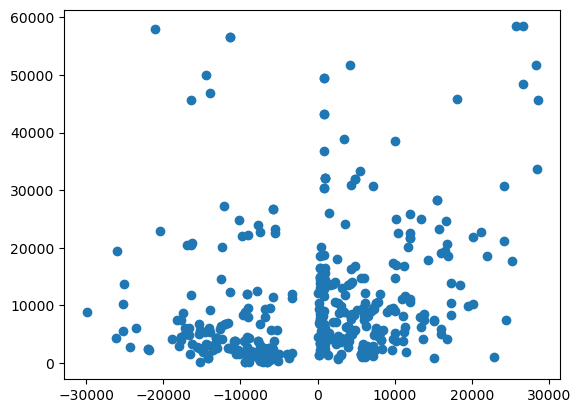

In [10]:
X,Y=df.pnl,df1.pnl
plt.scatter(X,Y)
print(np.corrcoef(X,Y))

Org
Precent Profit 0.625
Expected Profit 7011.37253
Expected Loss -11942.251666666667
             pnl  first_drawdown_pnl  second_drawdown_pnl  trade_count  \
count    384.000             384.000              384.000      384.000   
mean     -96.237            -985.569             -985.569        1.995   
std    11125.781           12207.023            12207.023        0.662   
min   -29932.000          -32523.500           -32523.500        1.000   
25%    -8984.843          -10550.900           -10550.900        2.000   
50%      841.723             841.723              841.723        2.000   
75%     6883.465            6883.465             6883.465        2.000   
max    28492.400           28492.400            28492.400        4.000   

       drawdown_count  
count         384.000  
mean            0.375  
std             0.485  
min             0.000  
25%             0.000  
50%             0.000  
75%             1.000  
max             1.000  

New
Precent Profit 1.0
Expecte

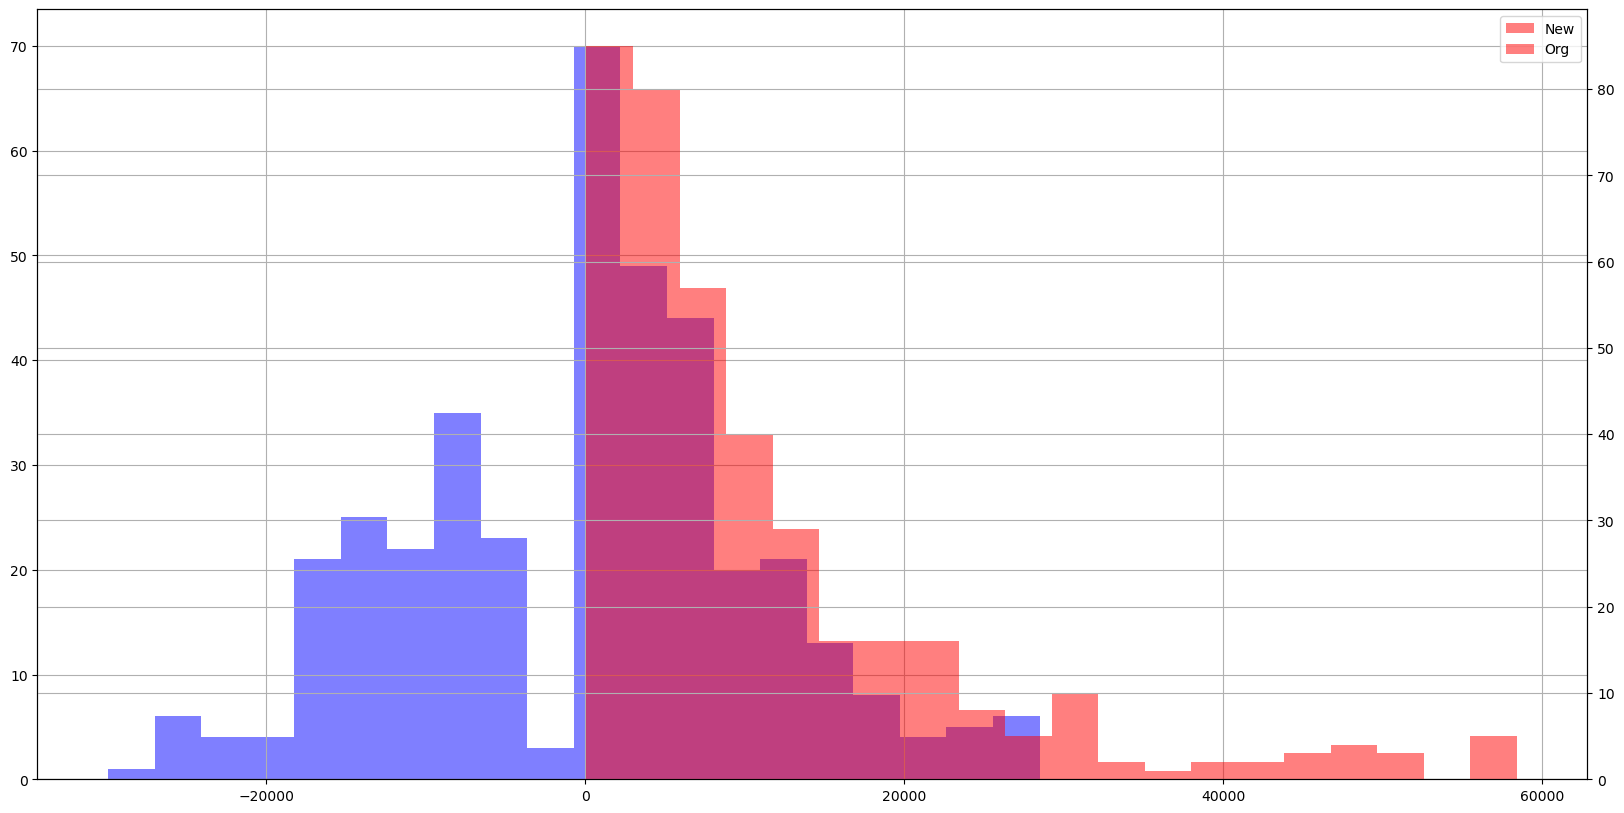

In [11]:
cols=df.underlying.unique().tolist()

for col in cols:
    print("Org")
    temp=df
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    ax=df.pnl.hist(bins=20,figsize=(20,10),label="New",alpha=0.5,color="b")
    ax1=ax.twinx()
    print("\nNew")
    temp=df1
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    df1.pnl.hist(bins=20,figsize=(20,10),label="Org",alpha=0.5,color="r",ax=ax1)    
plt.legend(['New','Org'])

In [13]:
cols=df.p_multiplier_string.unique().tolist()
for col in cols:
    print("\np_multiplier_string: ",col)
    temp=df[df.p_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'p_multiplier_string'

In [ ]:
cols=df1.p_multiplier_string.unique().tolist()
for col in cols:
    print("\np_multiplier_string: ",col)
    temp=df1[df1.p_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df.m_multiplier_string.unique().tolist()
for col in cols:
    print("\nm_multiplier_string: ",col)
    temp=df[df.m_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df1.m_multiplier_string.unique().tolist()
for col in cols:
    print("\nm_multiplier_string: ",col)
    temp=df1[df1.m_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df.pr_multiplier_string.unique().tolist()
for col in cols:
    print("\npr_multiplier_string: ",col)
    temp=df[df.pr_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df1.pr_multiplier_string.unique().tolist()
for col in cols:
    print("\npr_multiplier_string: ",col)
    temp=df1[df1.pr_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df1.pos_ratio.unique().tolist()
for col in cols:
    print("\npos_ratio: ",col)
    temp=df1[df1.pos_ratio==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df.pos_ratio.unique().tolist()
for col in cols:
    print("\npos_ratio: ",col)
    temp=df[df.pos_ratio==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()